# MakeItTalk Cartoon Quick Demo

## TDLR version

Remember to change to GPU runtime first!

## Preparation (run only once)

In [5]:
print('Git clone project and install requirements...')
!git clone https://github.com/yzhou359/MakeItTalk &> /dev/null
%cd /content/MakeItTalk
!export PYTHONPATH=/content/MakeItTalk:$PYTHONPATH
!pip install -r requirements.txt &> /dev/null
!pip install tensorboardX &> /dev/null
!mkdir examples/dump
!mkdir examples/ckpt
!pip install gdown &> /dev/null
print('Done!')
print('Download pre-trained models...')
!gdown -O examples/ckpt/ckpt_autovc.pth https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x
!gdown -O examples/ckpt/ckpt_content_branch.pth https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
!gdown -O examples/ckpt/ckpt_speaker_branch.pth https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
!gdown -O examples/ckpt/ckpt_116_i2i_comb.pth https://drive.google.com/uc?id=1i2LJXKp-yWKIEEgJ7C6cE3_2NirfY_0a
!gdown -O examples/dump/emb.pickle https://drive.google.com/uc?id=18-0CYl5E6ungS3H4rRSHjfYvvm-WwjTI
print('Done!')

Git clone project and install requirements...
/content/MakeItTalk
Done!
Download pre-trained models...
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1ZiwPp_h62LtjU0DwpelLUoodKPR85K7x 

Downloading...
From: https://drive.google.com/uc?id=1r3bfEvTVl6pCNw5xwUhEglwDHjWtAqQp
To: /content/MakeItTalk/examples/ckpt/ckpt_content_branch.pth
100% 7.88M/7.88M [00:00<00:00, 134MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rV0jkyDqPW-aDJcj7xSO6Zt1zSXqn1mu
To: /content/MakeItTalk/examples/ckpt/ckpt_speaker_branch.pth
100% 15.4M/15.4M [00:00<00:00, 102MB/s] 
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to 

## Animate your photos here!

- Upload your images to `examples_cartoon` with size `256x256`. Or use existing ones.

- Upload your speech audio files (could be many) to `examples`. Since it will process all `.wav` files under `examples`, remember to delete non-necessary `.wav` files. Or use an existing one `M6_04_16k.wav`.

## Step 1/3: Choose your image (in below Dropdown). 

Choose the image name to animate: (saved in folder 'examples_cartoon/')


Dropdown(index=47, options=('bluehead.jpg', 'bluehead_anno.jpg', 'boy.jpg', 'cartoonM - Copy.png', 'cartoonM.p…

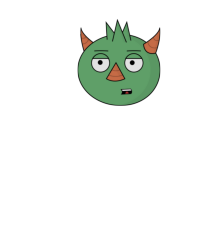

In [9]:
import ipywidgets as widgets
import glob
import matplotlib.pyplot as plt
print("Choose the image name to animate: (saved in folder 'examples_cartoon/')")
img_list = glob.glob1('examples_cartoon', '*.jpg') + glob.glob1('examples_cartoon', '*.png')
img_list.sort()
img_list = [item for item in img_list if '_bg' not in item]
default_head_name = widgets.Dropdown(options=img_list, value='wilk.png')
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plt.imshow(plt.imread('examples_cartoon/{}'.format(default_head_name.value)))
        plt.axis('off')
        plt.show()
default_head_name.observe(on_change)
display(default_head_name)
plt.imshow(plt.imread('examples_cartoon/{}'.format(default_head_name.value)))
plt.axis('off')
plt.show()

## Step 2/3: Setup your animation controllers (on right Sliders).

In [ ]:
#@markdown # Animation Controllers
#@markdown Amplify the lip motion in horizontal direction
AMP_LIP_SHAPE_X = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the lip motion in vertical direction
AMP_LIP_SHAPE_Y = 2 #@param {type:"slider", min:0.5, max:5.0, step:0.1}

#@markdown Amplify the head pose motion (usually smaller than 1.0, put it to 0. for a static head pose)
AMP_HEAD_POSE_MOTION = 0.35 #@param {type:"slider", min:0.0, max:1.0, step:0.05}

#@markdown Add naive eye blink
ADD_NAIVE_EYE = True  #@param ["False", "True"] {type:"raw"}

#@markdown If your image has an opened mouth, put this as True, else False
CLOSE_INPUT_FACE_MOUTH = False  #@param ["False", "True"] {type:"raw"}

## Step 3/3: One-click to Run (just wait in seconds).

In [ ]:
import sys
sys.path.append('thirdparty/AdaptiveWingLoss')
import os, glob
import numpy as np
import argparse
import pickle
from src.autovc.AutoVC_mel_Convertor_retrain_version import AutoVC_mel_Convertor
import shutil

GEN_AUDIO = True
GEN_FLS = True

%cd /content/MakeItTalk

parser = argparse.ArgumentParser()
parser.add_argument('--jpg', type=str, default=default_head_name.value)
parser.add_argument('--jpg_bg', type=str, default='wilk_bg.jpg')
parser.add_argument('--out', type=str, default='out.mp4')

parser.add_argument('--load_AUTOVC_name', type=str, default='examples/ckpt/ckpt_autovc.pth')
parser.add_argument('--load_a2l_G_name', type=str, default='examples/ckpt/ckpt_speaker_branch.pth') #ckpt_audio2landmark_g.pth') #
parser.add_argument('--load_a2l_C_name', type=str, default='examples/ckpt/ckpt_content_branch.pth') #ckpt_audio2landmark_c.pth')
parser.add_argument('--load_G_name', type=str, default='examples/ckpt/ckpt_116_i2i_comb.pth') #ckpt_i2i_finetune_150.pth') #ckpt_image2image.pth') #

parser.add_argument('--amp_lip_x', type=float, AMP_LIP_SHAPE_X)
parser.add_argument('--amp_lip_y', type=float, AMP_LIP_SHAPE_Y)
parser.add_argument('--amp_pos', type=float, default=AMP_HEAD_POSE_MOTION)
parser.add_argument('--reuse_train_emb_list', type=str, nargs='+', default=[]) #  ['E_kmpT-EfOg']) #  ['E_kmpT-EfOg']) # ['45hn7-LXDX8'])


parser.add_argument('--add_audio_in', default=False, action='store_true')
parser.add_argument('--comb_fan_awing', default=False, action='store_true')
parser.add_argument('--output_folder', type=str, default='examples_cartoon')

#### NEW POSE MODEL
parser.add_argument('--test_end2end', default=True, action='store_true')
parser.add_argument('--dump_dir', type=str, default='', help='')
parser.add_argument('--pos_dim', default=7, type=int)
parser.add_argument('--use_prior_net', default=True, action='store_true')
parser.add_argument('--transformer_d_model', default=32, type=int)
parser.add_argument('--transformer_N', default=2, type=int)
parser.add_argument('--transformer_heads', default=2, type=int)
parser.add_argument('--spk_emb_enc_size', default=16, type=int)
parser.add_argument('--init_content_encoder', type=str, default='')
parser.add_argument('--lr', type=float, default=1e-3, help='learning rate')
parser.add_argument('--reg_lr', type=float, default=1e-6, help='weight decay')
parser.add_argument('--write', default=False, action='store_true')
parser.add_argument('--segment_batch_size', type=int, default=512, help='batch size')
parser.add_argument('--emb_coef', default=3.0, type=float)
parser.add_argument('--lambda_laplacian_smooth_loss', default=1.0, type=float)
parser.add_argument('--use_11spk_only', default=False, action='store_true')
parser.add_argument('-f')

opt_parser = parser.parse_args()

DEMO_CH = opt_parser.jpg.split('.')[0]

shape_3d = np.loadtxt('{}/{}_face_close_mouth.txt'.format(opt_parser.output_folder, DEMO_CH))

''' STEP 3: Generate audio data as input to audio branch '''
au_data = []
au_emb = []
ains = glob.glob1('examples', '*.wav')
ains = [item for item in ains if item is not 'tmp.wav']
ains.sort()
for ain in ains:
    os.system('ffmpeg -y -loglevel error -i examples/{} -ar 16000 examples/tmp.wav'.format(ain))
    if(not os.path.isfile('examples/tmp.wav')):
        shutil.copyfile('examples/tmp.wav', 'examples/{}'.format(ain))

    # au embedding
    from thirdparty.resemblyer_util.speaker_emb import get_spk_emb
    me, ae = get_spk_emb('examples/{}'.format(ain))
    au_emb.append(me.reshape(-1))

    print('Processing audio file', ain)
    c = AutoVC_mel_Convertor('examples')
    au_data_i = c.convert_single_wav_to_autovc_input(audio_filename=os.path.join('examples', ain),
           autovc_model_path=opt_parser.load_AUTOVC_name)
    au_data += au_data_i
    # os.remove(os.path.join('examples', 'tmp.wav'))
if(os.path.isfile('examples/tmp.wav')):
    os.remove('examples/tmp.wav')

fl_data = []
rot_tran, rot_quat, anchor_t_shape = [], [], []
for au, info in au_data:
    au_length = au.shape[0]
    fl = np.zeros(shape=(au_length, 68 * 3))
    fl_data.append((fl, info))
    rot_tran.append(np.zeros(shape=(au_length, 3, 4)))
    rot_quat.append(np.zeros(shape=(au_length, 4)))
    anchor_t_shape.append(np.zeros(shape=(au_length, 68 * 3)))

if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_fl_interp.pickle'))
if(os.path.exists(os.path.join('examples', 'dump', 'random_val_au.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_au.pickle'))
if (os.path.exists(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))):
    os.remove(os.path.join('examples', 'dump', 'random_val_gaze.pickle'))

with open(os.path.join('examples', 'dump', 'random_val_fl.pickle'), 'wb') as fp:
    pickle.dump(fl_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_au.pickle'), 'wb') as fp:
    pickle.dump(au_data, fp)
with open(os.path.join('examples', 'dump', 'random_val_gaze.pickle'), 'wb') as fp:
    gaze = {'rot_trans':rot_tran, 'rot_quat':rot_quat, 'anchor_t_shape':anchor_t_shape}
    pickle.dump(gaze, fp)


''' STEP 4: RUN audio->landmark network'''
from src.approaches.train_audio2landmark import Audio2landmark_model
model = Audio2landmark_model(opt_parser, jpg_shape=shape_3d)
if(len(opt_parser.reuse_train_emb_list) == 0):
    model.test(au_emb=au_emb)
else:
    model.test(au_emb=None)
print('finish gen fls')

''' STEP 5: de-normalize the output to the original image scale '''
fls_names = glob.glob1(opt_parser.output_folder, 'pred_fls_*.txt')
fls_names.sort()

ains = glob.glob1('examples', '*.wav')
ains = [item for item in ains if item is not 'tmp.wav']
ains.sort()

for i in range(0,len(fls_names)):
    %cd /content/MakeItTalk
    if (not ains or i >= len(ains)):
        continue
    ain = ains[i]
    fl = np.loadtxt(os.path.join(opt_parser.output_folder, fls_names[i])).reshape((-1, 68,3))
    output_dir = os.path.join(opt_parser.output_folder, fls_names[i][:-4])
    try:
        os.makedirs(output_dir)
    except:
        pass

    from util.utils import get_puppet_info

    bound, scale, shift = get_puppet_info(DEMO_CH, ROOT_DIR=opt_parser.output_folder)

    fls = fl.reshape((-1, 68, 3))

    fls[:, :, 0:2] = -fls[:, :, 0:2]
    fls[:, :, 0:2] = (fls[:, :, 0:2] / scale)
    fls[:, :, 0:2] -= shift.reshape(1, 2)

    fls = fls.reshape(-1, 204)

    # additional smooth
    from scipy.signal import savgol_filter
    fls[:, 0:48*3] = savgol_filter(fls[:, 0:48*3], 17, 3, axis=0)
    fls[:, 48*3:] = savgol_filter(fls[:, 48*3:], 11, 3, axis=0)
    fls = fls.reshape((-1, 68, 3))

    if (DEMO_CH in ['paint', 'mulaney', 'cartoonM', 'beer', 'color', 'JohnMulaney', 'vangogh', 'jm', 'roy', 'lineface']):
        r = list(range(0, 68))
        fls = fls[:, r, :]
        fls = fls[:, :, 0:2].reshape(-1, 68 * 2)
        fls = np.concatenate((fls, np.tile(bound, (fls.shape[0], 1))), axis=1)
        fls = fls.reshape(-1, 160)

    else:
        r = list(range(0, 48)) + list(range(60, 68))
        fls = fls[:, r, :]
        fls = fls[:, :, 0:2].reshape(-1, 56 * 2)
        fls = np.concatenate((fls, np.tile(bound, (fls.shape[0], 1))), axis=1)
        fls = fls.reshape(-1, 112 + bound.shape[1])

    np.savetxt(os.path.join(output_dir, 'warped_points.txt'), fls, fmt='%.2f')

    # static_points.txt
    static_frame = np.loadtxt(os.path.join(opt_parser.output_folder, '{}_face_open_mouth.txt'.format(DEMO_CH)))
    static_frame = static_frame[r, 0:2]
    static_frame = np.concatenate((static_frame, bound.reshape(-1, 2)), axis=0)
    np.savetxt(os.path.join(output_dir, 'reference_points.txt'), static_frame, fmt='%.2f')

    # triangle_vtx_index.txt
    shutil.copy(os.path.join(opt_parser.output_folder, DEMO_CH + '_delauney_tri.txt'),
                os.path.join(output_dir, 'triangulation.txt'))

    os.remove(os.path.join(opt_parser.output_folder, fls_names[i]))

    # ==============================================
    # Step 4 : Vector art morphing
    # ==============================================
    warp_exe = os.path.join(os.getcwd(), 'facewarp', 'facewarp.exe')
    import os
    
    if (os.path.exists(os.path.join(output_dir, 'output'))):
        shutil.rmtree(os.path.join(output_dir, 'output'))
    os.mkdir(os.path.join(output_dir, 'output'))
    os.chdir('{}'.format(os.path.join(output_dir, 'output')))
    cur_dir = os.getcwd()
    
    if(os.name == 'nt'): 
        ''' windows '''
        os.system('{} {} {} {} {} {}'.format(
            warp_exe,
            os.path.join(cur_dir, '..', '..', opt_parser.jpg),
            os.path.join(cur_dir, '..', 'triangulation.txt'),
            os.path.join(cur_dir, '..', 'reference_points.txt'),
            os.path.join(cur_dir, '..', 'warped_points.txt'),
            os.path.join(cur_dir, '..', '..', opt_parser.jpg_bg),
            '-novsync -dump'))
    else:
        ''' linux '''
        os.system('wine {} {} {} {} {} {}'.format(
            warp_exe,
            os.path.join(cur_dir, '..', '..', opt_parser.jpg),
            os.path.join(cur_dir, '..', 'triangulation.txt'),
            os.path.join(cur_dir, '..', 'reference_points.txt'),
            os.path.join(cur_dir, '..', 'warped_points.txt'),
            os.path.join(cur_dir, '..', '..', opt_parser.jpg_bg),
            '-novsync -dump'))
    os.system('ffmpeg -y -r 62.5 -f image2 -i "%06d.tga" -i {} -pix_fmt yuv420p -vf "pad=ceil(iw/2)*2:ceil(ih/2)*2" -shortest -strict -2 {}'.format(
        os.path.join(cur_dir, '..', '..', '..', 'examples', ain),
        os.path.join(cur_dir, 'out.mp4')
    ))

/content/MakeItTalk
Loaded the voice encoder model on cuda in 0.01 seconds.
Processing audio file M6_04_16k.wav
0 out of 0 are in this portion
Loaded the voice encoder model on cuda in 0.02 seconds.
source shape: torch.Size([1, 320, 80]) torch.Size([1, 256]) torch.Size([1, 256]) torch.Size([1, 320, 257])
converted shape: torch.Size([1, 320, 80]) torch.Size([1, 640])
Loaded the voice encoder model on cuda in 0.01 seconds.
Processing audio file Q1.wav
0 out of 0 are in this portion
Loaded the voice encoder model on cuda in 0.01 seconds.
source shape: torch.Size([1, 160, 80]) torch.Size([1, 256]) torch.Size([1, 256]) torch.Size([1, 160, 257])
converted shape: torch.Size([1, 160, 80]) torch.Size([1, 320])
Loaded the voice encoder model on cuda in 0.01 seconds.
Processing audio file Q2.wav
0 out of 0 are in this portion
Loaded the voice encoder model on cuda in 0.01 seconds.
source shape: torch.Size([1, 224, 80]) torch.Size([1, 256]) torch.Size([1, 256]) torch.Size([1, 224, 257])
converted 

## Visualize your animation!

In [ ]:
from IPython.display import HTML
from base64 import b64encode

for ain in ains:
  OUTPUT_MP4_NAME = '{}_pred_fls_{}_audio_embed.mp4'.format(
    opt_parser.jpg.split('.')[0],
    ain.split('.')[0]
    )
  mp4 = open('examples/{}'.format(OUTPUT_MP4_NAME),'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

  print('Display animation: examples/{}'.format(OUTPUT_MP4_NAME), file=sys.stderr)
  display(HTML("""
  <video width=600 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url))

Display animation: examples/dragonmom_pred_fls_M6_04_16k_audio_embed.mp4
